In [145]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif

from sklearn.ensemble import GradientBoostingClassifier


In [146]:
# 1.
url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv"
data = pd.read_csv(url)

print("Dataset shape:", data.shape)
print("Columns:", data.columns.tolist())
data.head()

Dataset shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [147]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

In [148]:
# 2.
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
categorical_cols = ['sex','cp', 'fbs', 'restecg', 'exang','slope', 'thal','ca']
df = pd.get_dummies(data, columns = categorical_cols, drop_first=True)
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})
print(df.head())


        age  trestbps      chol   thalach   oldpeak  num  sex_1  cp_2  cp_3  \
0  0.948726  0.757525 -0.264900  0.017197  1.087338    0      1     0     0   
1  1.392002  1.611220  0.760415 -1.821905  0.397182    2      1     0     0   
2  1.392002 -0.665300 -0.342283 -0.902354  1.346147    1      1     0     0   
3 -1.932564 -0.096170  0.063974  1.637359  2.122573    0      1     0     1   
4 -1.489288 -0.096170 -0.825922  0.980537  0.310912    0      0     1     0   

   cp_4  ...  restecg_1  restecg_2  exang_1  slope_2  slope_3  thal_6.0  \
0     0  ...          0          1        0        0        1         1   
1     1  ...          0          1        1        1        0         0   
2     1  ...          0          1        1        1        0         0   
3     0  ...          0          0        0        0        1         0   
4     0  ...          0          1        0        0        0         0   

   thal_7.0  ca_1.0  ca_2.0  ca_3.0  
0         0       0       0       0 

In [149]:
#3
print(df.shape)
print("\nData types:")
print(df.dtypes)


(303, 21)

Data types:
age          float64
trestbps     float64
chol         float64
thalach      float64
oldpeak      float64
num            int64
sex_1          int64
cp_2           int64
cp_3           int64
cp_4           int64
fbs_1          int64
restecg_1      int64
restecg_2      int64
exang_1        int64
slope_2        int64
slope_3        int64
thal_6.0       int64
thal_7.0       int64
ca_1.0         int64
ca_2.0         int64
ca_3.0         int64
dtype: object


In [150]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                age      trestbps          chol       thalach       oldpeak  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02   
mean  -1.465641e-18  4.426236e-16  2.345026e-16 -1.172513e-16  2.345026e-17   
std    1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00   
min   -2.819115e+00 -2.145037e+00 -2.334877e+00 -3.442067e+00 -8.968617e-01   
25%   -7.135564e-01 -6.652997e-01 -6.905030e-01 -7.053073e-01 -8.968617e-01   
50%    1.729945e-01 -9.616980e-02 -1.101357e-01  1.485618e-01 -2.067053e-01   
75%    7.270888e-01  4.729601e-01  5.476139e-01  7.178079e-01  4.834512e-01   
max    2.500191e+00  3.887739e+00  6.138485e+00  2.294182e+00  4.451851e+00   

              num       sex_1        cp_2        cp_3        cp_4  ...  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  ...   
mean     0.937294    0.679868    0.165017    0.283828    0.475248  ...   
std      1.228536    0.467299    0.371809    

In [151]:
missing_values = data.isnull().sum()
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

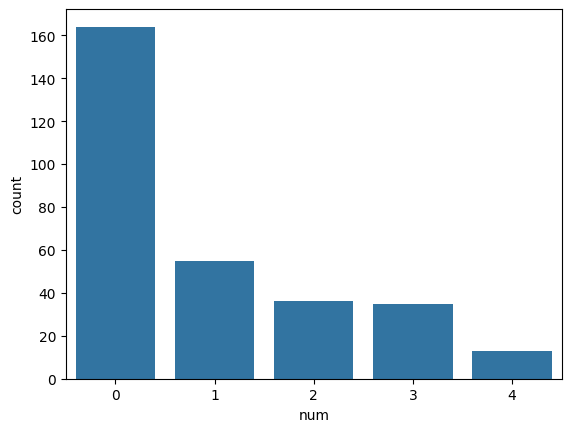

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [152]:
sns.countplot(x="num", data=df)
plt.show()
print(df['num'].value_counts())

Statements:

1. The dataset contains 303 observations and 14 initial features (before one-hot encoding), with both numerical and categorical variables.

2. After preprocessing, the dataset has 19 columns due to one-hot encoding of categorical features.

3. There are missing values in variables ca (4 missing) and thal (2 missing) before transform.

3. The most of target variable num sperade in 0, and need to transform to binary since the range is 0-4.

In [153]:
#4
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0) 
print(df['target'].value_counts())
print(df.head())

target
0    164
1    139
Name: count, dtype: int64
        age  trestbps      chol   thalach   oldpeak  num  sex_1  cp_2  cp_3  \
0  0.948726  0.757525 -0.264900  0.017197  1.087338    0      1     0     0   
1  1.392002  1.611220  0.760415 -1.821905  0.397182    2      1     0     0   
2  1.392002 -0.665300 -0.342283 -0.902354  1.346147    1      1     0     0   
3 -1.932564 -0.096170  0.063974  1.637359  2.122573    0      1     0     1   
4 -1.489288 -0.096170 -0.825922  0.980537  0.310912    0      0     1     0   

   cp_4  ...  restecg_2  exang_1  slope_2  slope_3  thal_6.0  thal_7.0  \
0     0  ...          1        0        0        1         1         0   
1     1  ...          1        1        1        0         0         0   
2     1  ...          1        1        1        0         0         1   
3     0  ...          0        0        0        1         0         0   
4     0  ...          1        0        0        0         0         0   

   ca_1.0  ca_2.0  ca_3.0  ta

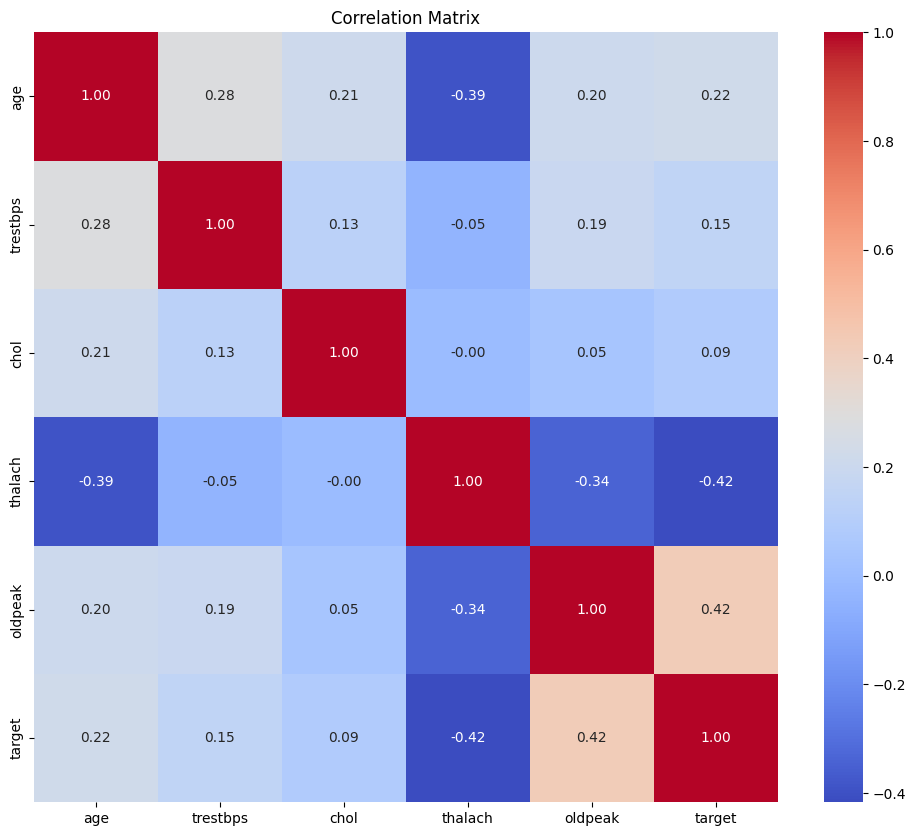

In [154]:
#5
corr = df[numerical_cols + ['target']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The variable `thalach` and `oldpeak` all show significant positive relationships with the presence of heart disease. These variables are likely to contribute meaningful information and should be prioritized during feature selection.

In contrast, variables such as `chol` (serum cholesterol) show very weak correlations with the `target`, indicating they may be less useful for classification and could potentially be excluded to reduce model complexity without sacrificing performance.

In [155]:
#6
print("\nMissing values:\n",data.isnull().sum())


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [156]:
data_removed = data.dropna().copy()
data_removed.shape

(297, 14)

There are 6 missing values and 297 observations after dropping the missing
 values.

In [157]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()


data_removed[numerical_cols] = scaler.fit_transform(data_removed[numerical_cols])
categorical_cols = ['sex','cp', 'fbs', 'restecg', 'exang','slope', 'thal','ca']
df = pd.get_dummies(data_removed, columns = categorical_cols, drop_first=True)
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})
print(df.head())

        age  trestbps      chol   thalach   oldpeak  num  sex_1  cp_2  cp_3  \
0  0.936181  0.750380 -0.276443  0.017494  1.068965    0      1     0     0   
1  1.378929  1.596266  0.744555 -1.816334  0.381773    2      1     0     0   
2  1.378929 -0.659431 -0.353500 -0.899420  1.326662    1      1     0     0   
3 -1.941680 -0.095506  0.051047  1.633010  2.099753    0      1     0     1   
4 -1.498933 -0.095506 -0.835103  0.978071  0.295874    0      0     1     0   

   cp_4  ...  restecg_1  restecg_2  exang_1  slope_2  slope_3  thal_6.0  \
0     0  ...          0          1        0        0        1         1   
1     1  ...          0          1        1        1        0         0   
2     1  ...          0          1        1        1        0         0   
3     0  ...          0          0        0        0        1         0   
4     0  ...          0          1        0        0        0         0   

   thal_7.0  ca_1.0  ca_2.0  ca_3.0  
0         0       0       0       0 

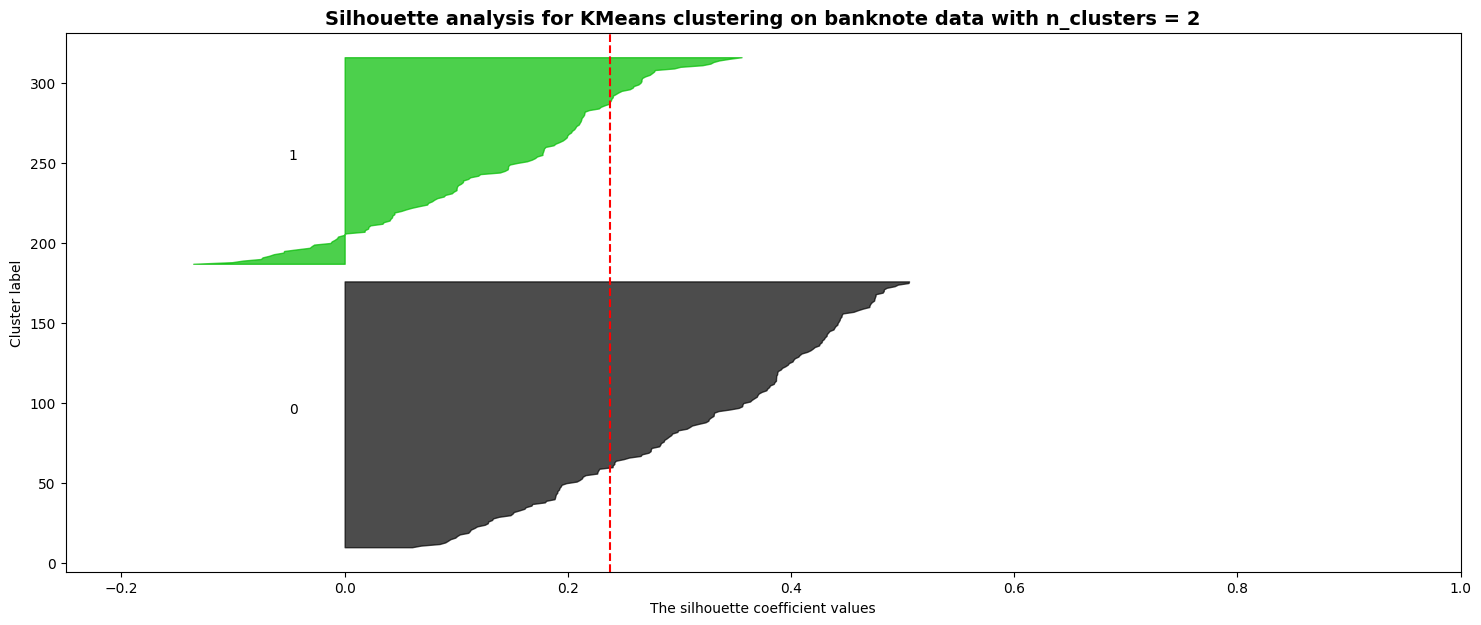

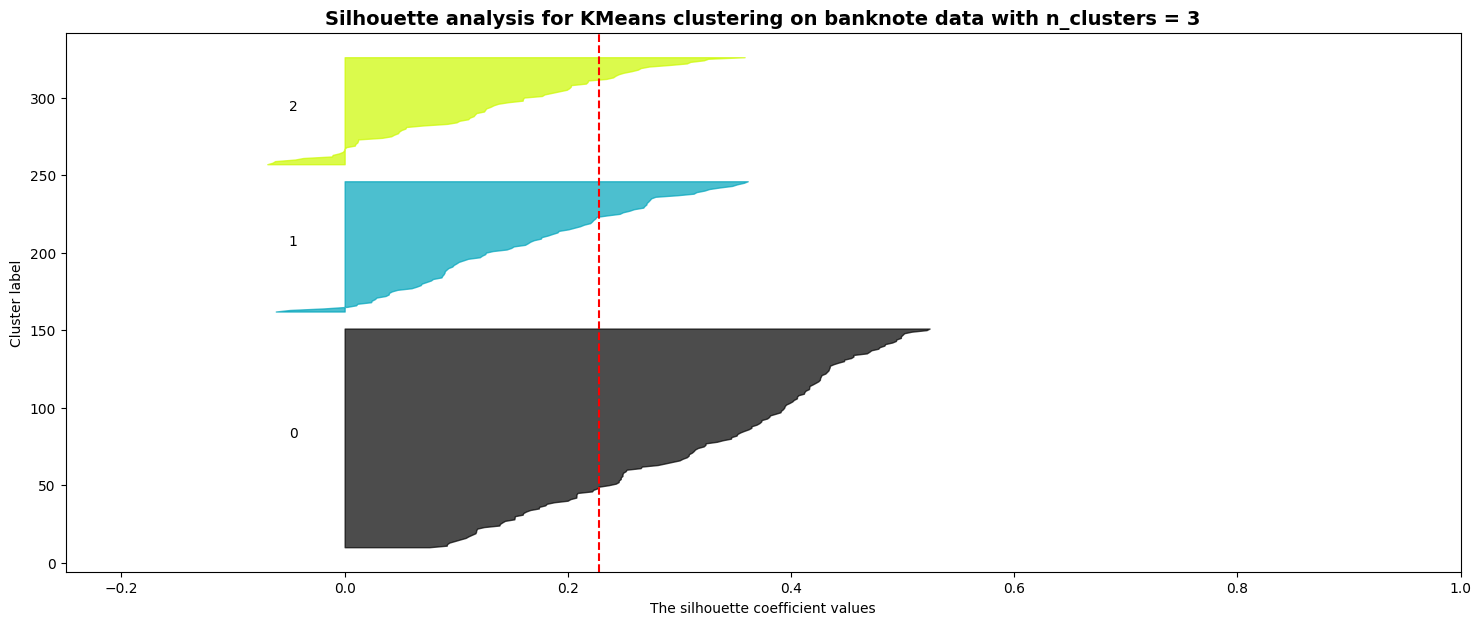

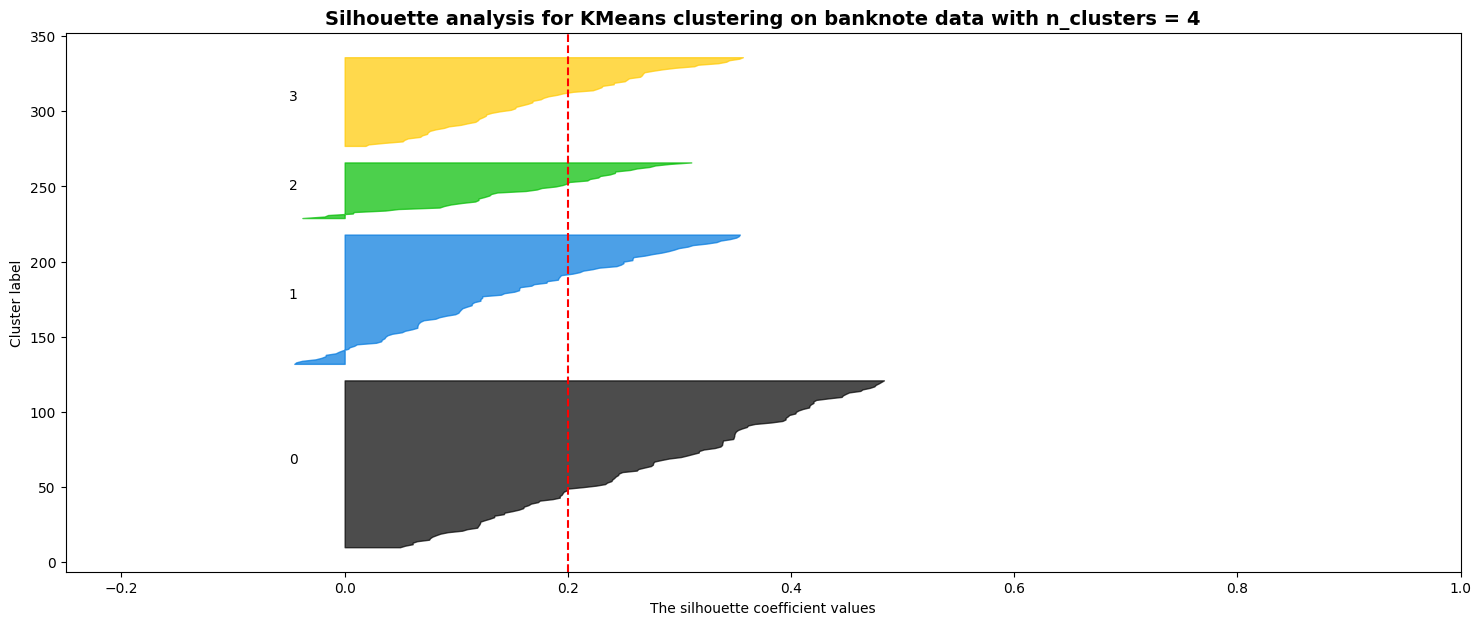

In [158]:
#7
range_n_clusters = range(2, 5)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(df[numerical_cols])
    silhouette_avg_km = silhouette_score(df[numerical_cols], cluster_labels_km)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df[numerical_cols], cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on banknote data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )


The best k=2 because the average silhouette score is the highest for this value of k. 

In [159]:
pca = PCA()
pca_result = pca.fit_transform(df[numerical_cols])
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2','PC3','PC4','PC5'])

In [160]:
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_[:2]))

[0.35937581 0.21941782 0.1741138  0.15313121 0.09396136]
0.5787936281800568


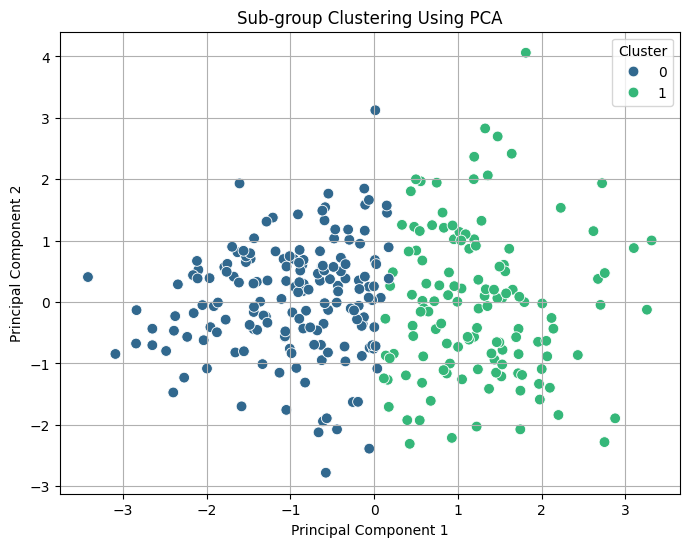

In [161]:
kmeans = KMeans(n_clusters=2, n_init=20, random_state=1)
pca_df['Cluster'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='viridis', s=60)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Sub-group Clustering Using PCA')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [162]:
#8
X = df.drop(columns='num')
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=1,
    stratify=y
)
print(len(X_train), len(X_test))

207 90


9. 
**Logistic Regression:** A linear classifier that is simple, fast, and highly interpretable (weights indicate feature influence). Logistic regression works well if the relationship between features and log-odds of the outcome is roughly linear. Given many strong risk factors (e.g., *oldpeak*, etc.), a logistic model can directly model the probability of disease. It also handles binary and continuous features (after dummy encoding) and is less prone to overfitting with fewer parameters. We also choose it for its interpretability – important in medical contexts to understand predictors.

**Random Forest:** An ensemble of decision trees that can capture non-linear interactions between features. Random forests handle heterogeneous feature types naturally and are robust to outliers. Considering our data might have non-linear effects (e.g., extremely high oldpeak might exponentially raise risk), a Random Forest can model such effects better than a linear model. It can also automatically handle feature interactions (e.g., a combination of moderate oldpeak and high chol might indicate risk even if individually moderate). Additionally, Random Forests provide feature importance estimates, which is useful for insight. Given the moderate dataset size (303), a Random Forest can be trained quickly and tends not to overfit if we constrain depth.


10. 
We should select `Accuracy` and `ROC-AUC` as evaluation metrics.

`Accuracy`: (TP + TN) / (TP + TN + FP + FN),  where TP, TN, FP, FN are true positives, true negatives, false positives, and false negatives respectively. Accuracy gives an overall success rate of the classifier. In our case, since the classes are fairly balanced, accuracy is a reasonable metric for overall performance. However, accuracy alone can be misleading if the cost of false negatives vs false positives differs (in medicine, missing a disease case might be worse than a false alarm). Thus, we include a metric sensitive to class imbalance or errors distribution.

`ROC AUC`: Area under the Receiver Operating Characteristic curve.
ROC-AUC evaluates how well the model distinguishes between the classes across all thresholds, making it robust for imbalanced or threshold-sensitive applications.

In [163]:
m_log = LogisticRegression()
m_log.fit(X_train, y_train)

LogisticRegression()

In [164]:
# predict the prob on test set
pred_prob = m_log.predict_proba(X_test)
pred_prob

array([[2.68180383e-01, 5.14702783e-01, 9.70366446e-02, 5.48871105e-02,
        6.51930793e-02],
       [1.20808288e-02, 3.16260555e-01, 5.66503807e-01, 7.58225073e-02,
        2.93323023e-02],
       [1.24549359e-01, 2.80105679e-01, 4.62612555e-01, 1.02958464e-01,
        2.97739429e-02],
       [9.88060565e-01, 1.05049939e-02, 5.59741565e-04, 8.44151099e-04,
        3.05482696e-05],
       [9.47423563e-01, 2.74829676e-02, 1.15152168e-02, 1.11228743e-02,
        2.45537853e-03],
       [8.37688309e-01, 1.20735805e-01, 1.23686758e-02, 2.44612955e-02,
        4.74591536e-03],
       [6.92769253e-01, 2.13192821e-01, 1.82870843e-02, 5.55790592e-02,
        2.01717819e-02],
       [9.64410129e-01, 2.42098344e-02, 3.58053726e-03, 5.59522255e-03,
        2.20427708e-03],
       [1.31384939e-02, 5.13533979e-01, 3.65063792e-01, 7.68886699e-02,
        3.13750648e-02],
       [9.27774509e-01, 4.64899227e-02, 1.66131380e-02, 2.54955726e-03,
        6.57287341e-03],
       [9.89099847e-01, 8.9565

In [165]:
df_roc = pd.DataFrame(
    data = {'prob1': pred_prob[:,1], 'y_test': y_test}
    )

df_roc['y_test_pred'] = df_roc.prob1.map(lambda x: 'Yes' if x>0.35 else 'No')
df_roc['y_test_pred'] = m_log.predict(X_test)
cm = confusion_matrix(df_roc.y_test, df_roc.y_test_pred)

total = sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]) 
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Accuracy :  0.5333333333333333
Sensitivity :  0.3333333333333333
Specificity :  0.9361702127659575


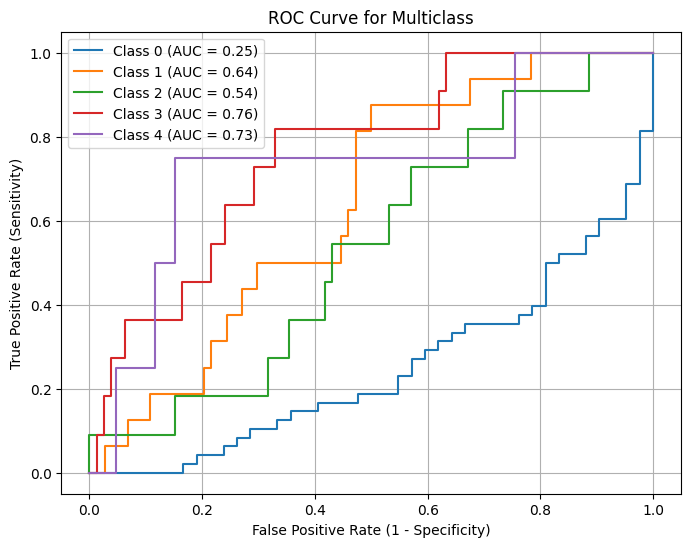

In [166]:
from sklearn.preprocessing import label_binarize

# Binarize the output labels for multiclass ROC
classes = sorted(df_roc.y_test.unique())
y_test_binarized = label_binarize(df_roc.y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
	fpr, tpr, _ = roc_curve(y_test_binarized[:, i], df_roc.prob1)
	auc_score = roc_auc_score(y_test_binarized[:, i], df_roc.prob1)
	plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Multiclass')
plt.legend()
plt.grid(True)
plt.show()

In [167]:
# Ensure that df_encoded_clean, X_train, and y_train are defined before training final models
if 'data_removed' not in globals():
	data_removed = data_removed.dropna()

if 'X_train' not in globals() or 'y_train' not in globals():
	X = data_removed.drop('target', axis=1)
	y = data_removed['target']
	X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size=0.3, random_state=1, stratify=y)

# Train final models with best params
best_lr = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', random_state=1)
best_lr.fit(X_train, y_train)

best_rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0)
best_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=0)

In [168]:
# 12.

# Select top 5 features from X_train
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
selected_cols = X_train.columns[selector.get_support()]
print("Selected top 5 features:", list(selected_cols))

# Train logistic regression on selected features (tune C as well)
param_grid_sel = {'C': [0.1, 1, 10]}
grid_lr_sel = GridSearchCV(LogisticRegression(max_iter=1000, solver='liblinear', random_state=1),
                           param_grid_sel, cv=5, scoring='f1')
grid_lr_sel.fit(X_train_sel, y_train)
print("Best params for LR (selected features):", grid_lr_sel.best_params_)
best_lr_sel = grid_lr_sel.best_estimator_


Selected top 5 features: ['thalach', 'cp_3', 'cp_4', 'exang_1', 'thal_7.0']
Best params for LR (selected features): {'C': 0.1}


/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^

In [170]:
# 13.
from sklearn.metrics import accuracy_score, f1_score
# Predictions on the test set
y_pred_lr   = best_lr.predict(X_test)
y_pred_rf   = best_rf.predict(X_test)
y_pred_sel  = best_lr_sel.predict(X_test_sel)

# Compute accuracy and F1 for each
acc_lr  = accuracy_score(y_test, y_pred_lr)
f1_lr   = f1_score(y_test, y_pred_lr, average='macro')
acc_rf  = accuracy_score(y_test, y_pred_rf)
f1_rf   = f1_score(y_test, y_pred_rf, average='macro')
acc_sel = accuracy_score(y_test, y_pred_sel)
f1_sel  = f1_score(y_test, y_pred_sel, average='macro')

print(f"Logistic (all features) - Accuracy: {acc_lr:.3f}, F1: {f1_lr:.3f}")
print(f"Random Forest (all features) - Accuracy: {acc_rf:.3f}, F1: {f1_rf:.3f}")
print(f"Logistic (top 5 features) - Accuracy: {acc_sel:.3f}, F1: {f1_sel:.3f}")


Logistic (all features) - Accuracy: 0.600, F1: 0.313
Random Forest (all features) - Accuracy: 0.578, F1: 0.240
Logistic (top 5 features) - Accuracy: 0.600, F1: 0.285
